In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

In [10]:
apps_df = pd.read_csv("C:\\Users\\91739\\Downloads\\apps.csv")
user_reviews_df = pd.read_csv("C:\\Users\\91739\\Downloads\\user_reviews.csv")

print("apps_df")
print(apps_df.head())

print("user_reviews_df")
print(user_reviews_df.head())
# Clean the apps data
# Remove duplicates
apps_df = apps_df.drop_duplicates(subset='App')

# Clean the 'Size' column
apps_df['Size'] = apps_df['Size'].astype(str)  # Convert all values to strings
apps_df['Size'] = apps_df['Size'].str.replace('M', '')  # Remove 'M'
apps_df['Size'] = apps_df['Size'].str.replace('k', '').str.replace(',', '')  # Remove 'k' and commas
apps_df['Size'] = apps_df['Size'].replace('Varies with device', np.nan)  # Replace 'Varies with device' with NaN
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')  # Convert to numeric
apps_df.loc[apps_df['Size'] < 1000, 'Size'] = apps_df.loc[apps_df['Size'] < 1000, 'Size'] / 1000  # Convert KB to MB

# Clean the 'Installs' column
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Clean the 'Price' column
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

# Clean the 'Reviews' column
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')

# Check cleaned data
print("\nCleaned Apps Data:")
print(apps_df.head())


apps_df
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend

C:\Users\91739\AppData\Local\Temp\ipykernel_30144\962426718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


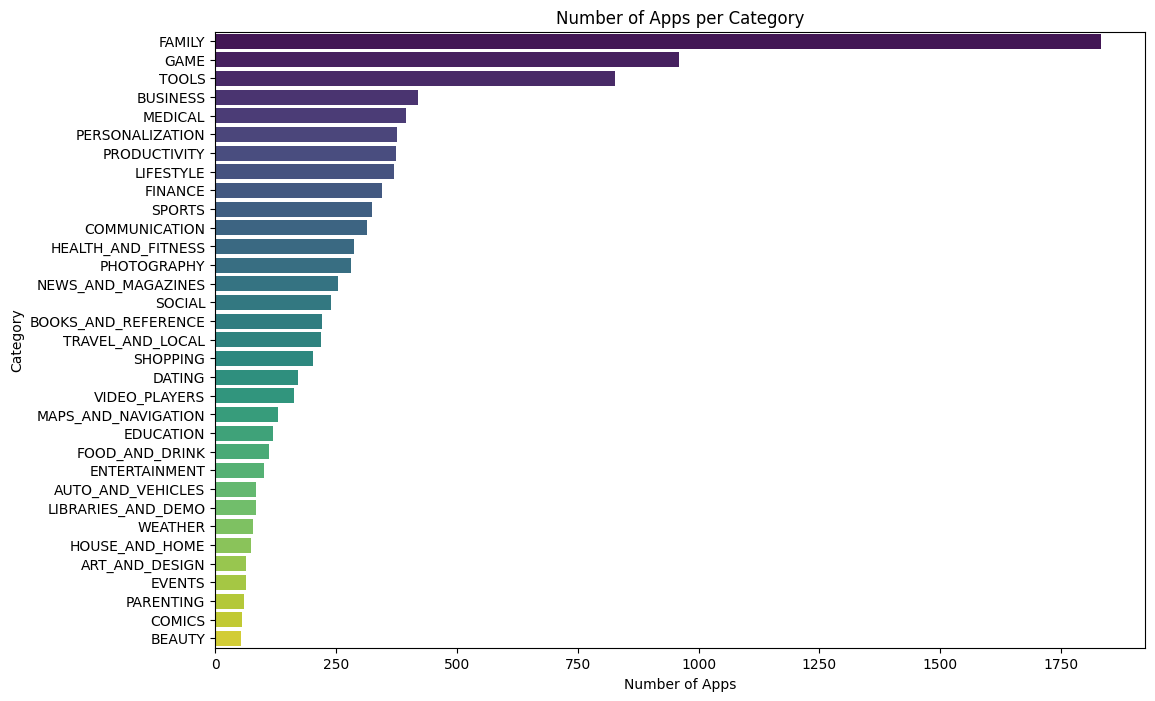

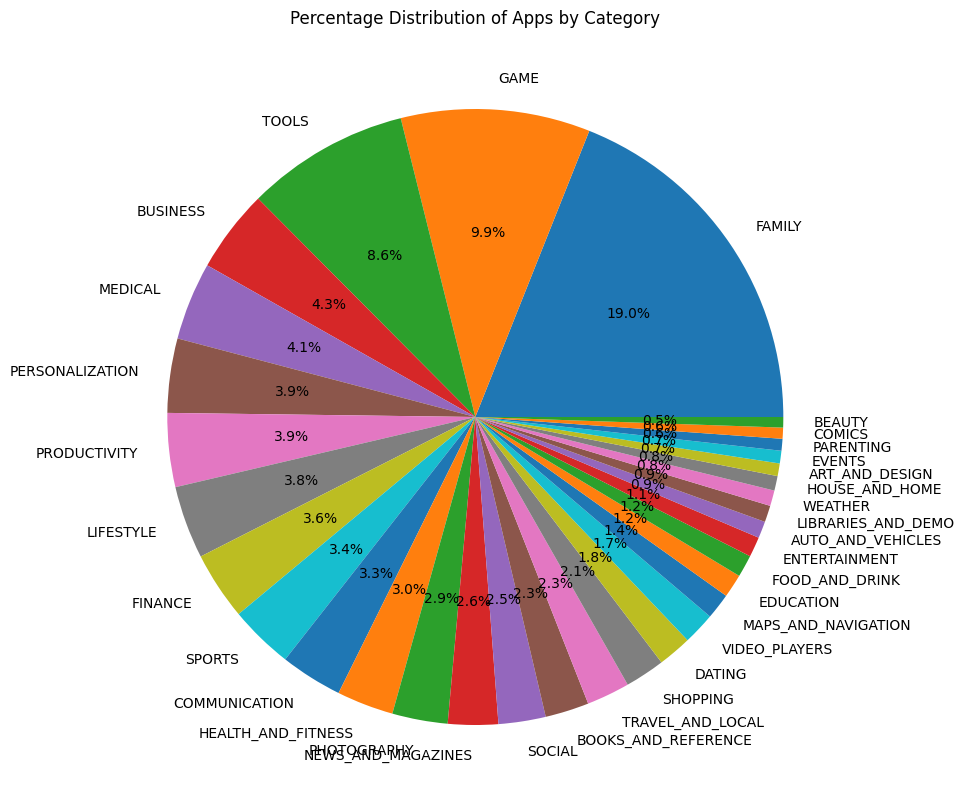


Top 10 Categories by Number of Apps:
Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64


In [11]:
# App distribution by category
plt.figure(figsize=(12, 8))
category_counts = apps_df['Category'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

# Percentage distribution
plt.figure(figsize=(10, 10))
apps_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Apps by Category')
plt.ylabel('')
plt.show()

# Top 10 categories by number of apps
top_categories = apps_df['Category'].value_counts().nlargest(10)
print("\nTop 10 Categories by Number of Apps:")
print(top_categories)

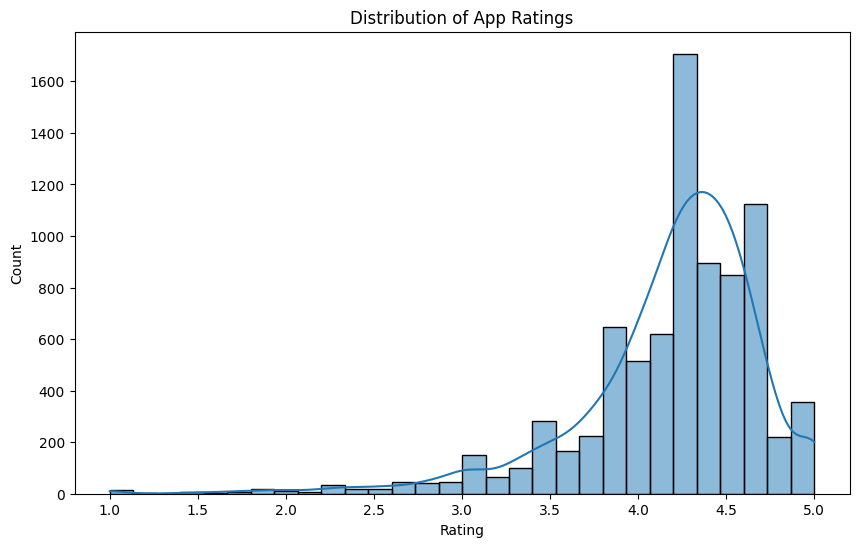


Rating Statistics:
count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


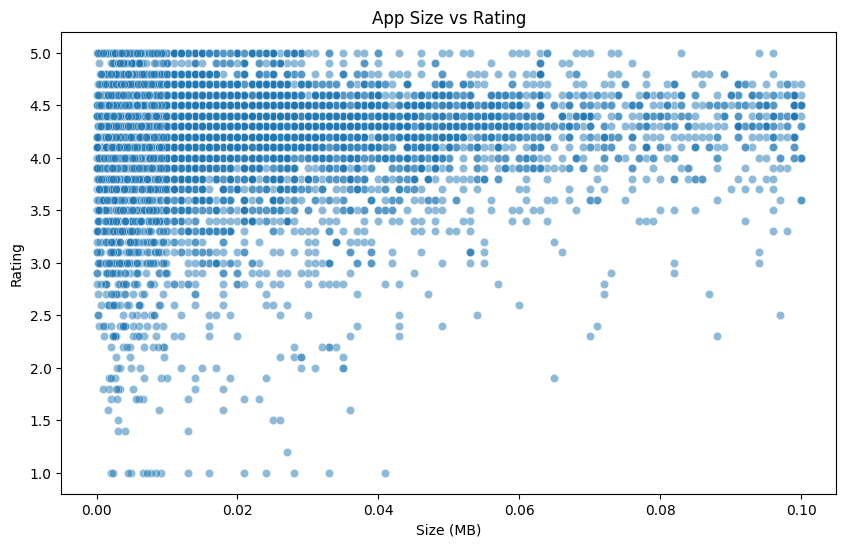

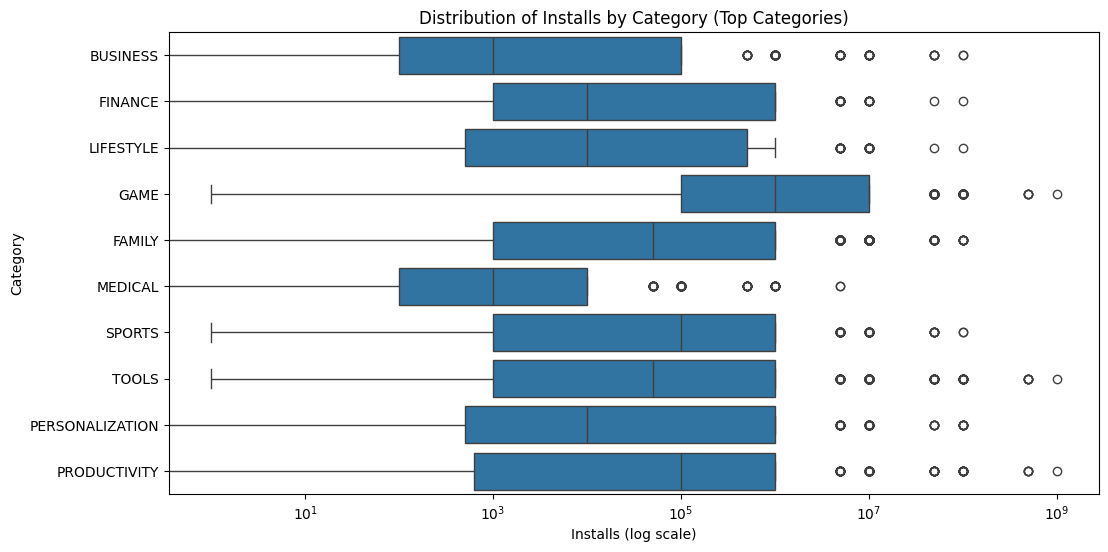

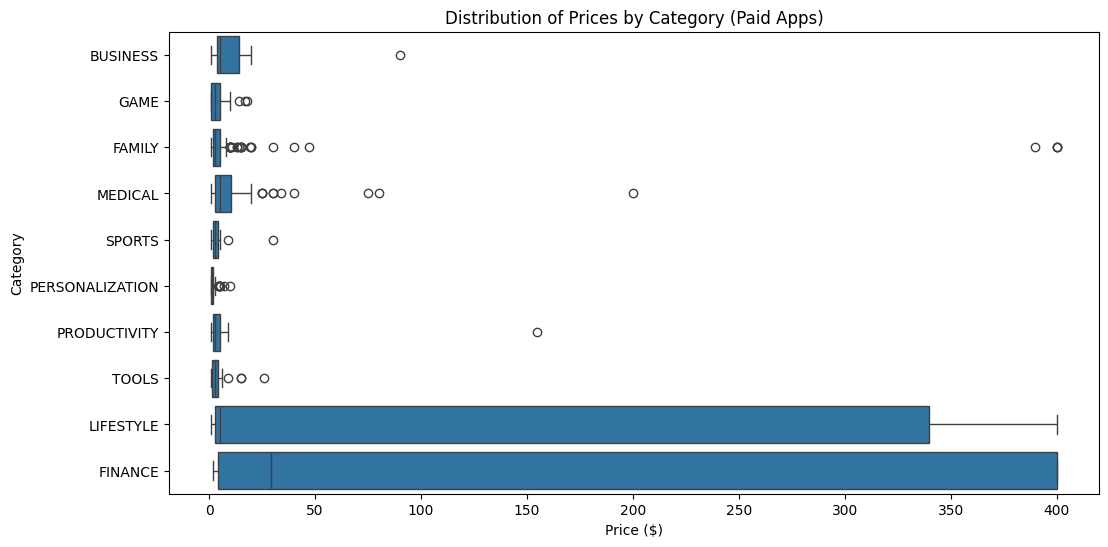

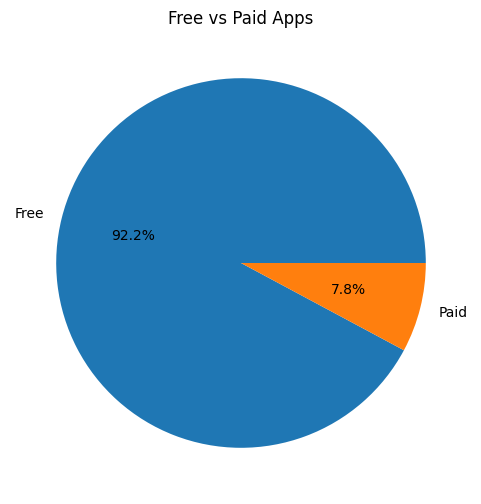

In [13]:
# Ratings analysis
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print("\nRating Statistics:")
print(apps_df['Rating'].describe())

# Size vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=apps_df, alpha=0.5)
plt.title('App Size vs Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Installs analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs', y='Category', data=apps_df[apps_df['Category'].isin(top_categories.index)], orient='h')
plt.title('Distribution of Installs by Category (Top Categories)')
plt.xlabel('Installs (log scale)')
plt.xscale('log')
plt.show()

# Pricing trends
paid_apps = apps_df[apps_df['Type'] == 'Paid']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', y='Category', data=paid_apps[paid_apps['Category'].isin(top_categories.index)], orient='h')
plt.title('Distribution of Prices by Category (Paid Apps)')
plt.xlabel('Price ($)')
plt.show()

# Free vs Paid apps
type_dist = apps_df['Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_dist, labels=type_dist.index, autopct='%1.1f%%')
plt.title('Free vs Paid Apps')
plt.show()

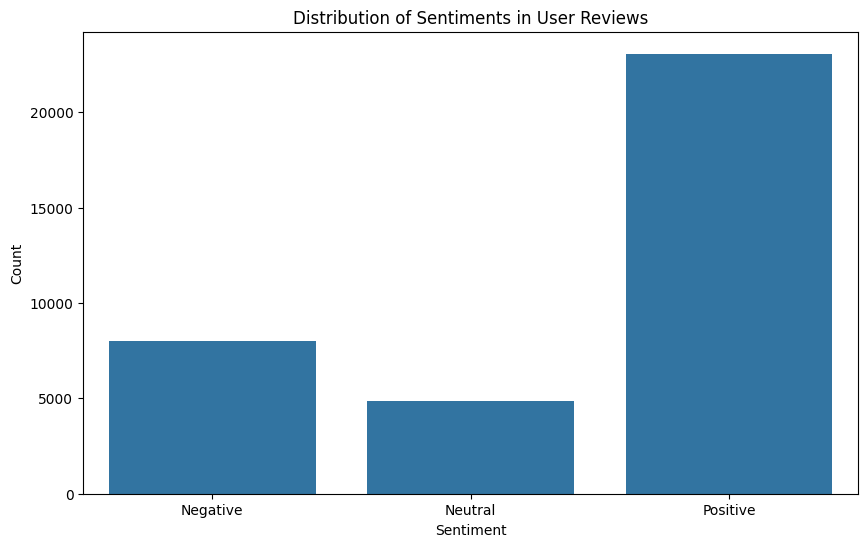

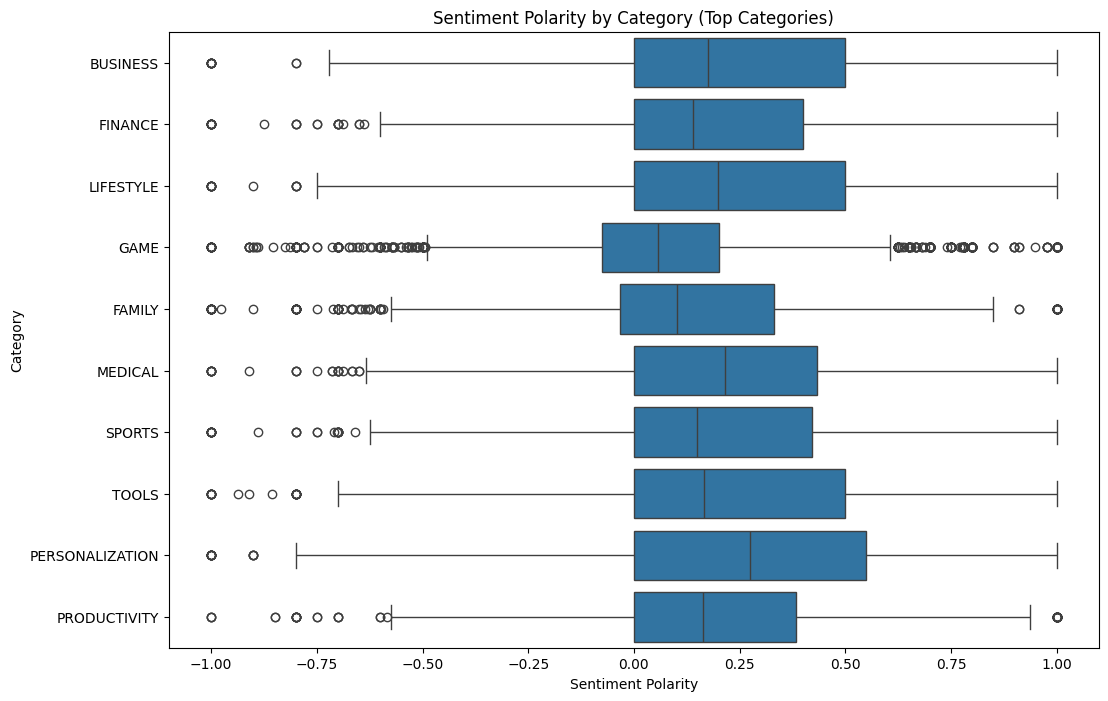

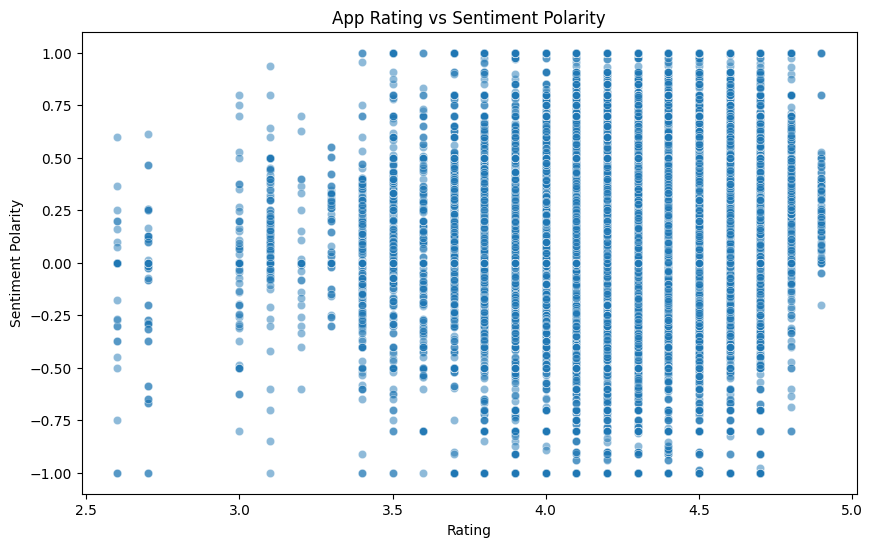

In [14]:
# Merge apps with reviews
merged = pd.merge(apps_df, user_reviews_df, left_on='App', right_on='App', how='inner')

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=merged)
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment_Polarity', y='Category', 
            data=merged[merged['Category'].isin(top_categories.index)])
plt.title('Sentiment Polarity by Category (Top Categories)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Category')
plt.show()

# Sentiment vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Sentiment_Polarity', data=merged, alpha=0.5)
plt.title('App Rating vs Sentiment Polarity')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

In [16]:
# Interactive category distribution
fig = px.treemap(apps_df, path=['Category'], title='App Distribution by Category')
fig.show()

# Interactive rating vs size
fig = px.scatter(apps_df, x='Size', y='Rating', color='Type', 
                 hover_data=['App', 'Category'],
                 title='App Rating vs Size')
fig.show()

# Interactive sentiment analysis
fig = px.box(merged[merged['Category'].isin(top_categories.index)], 
             x='Sentiment_Polarity', y='Category', 
             color='Category', title='Sentiment Polarity by Category')
fig.show()

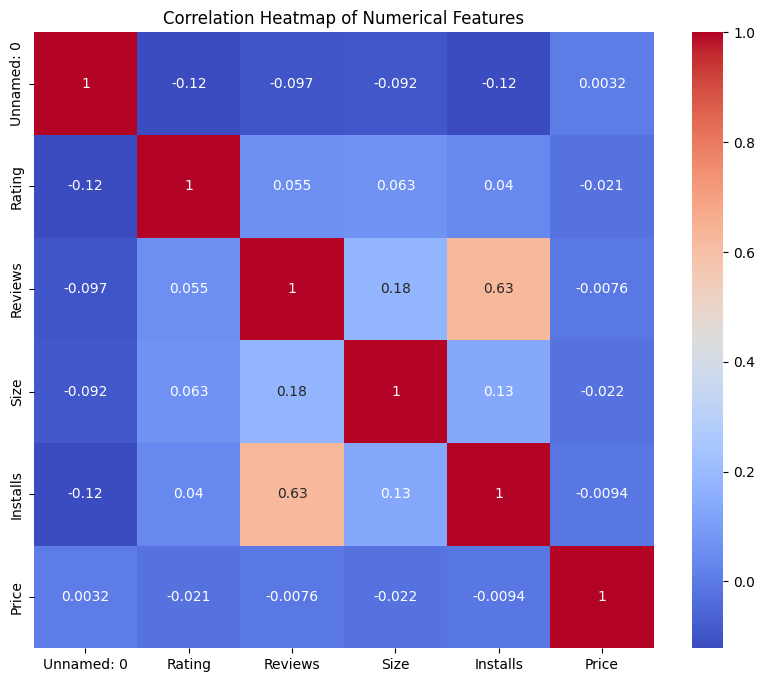

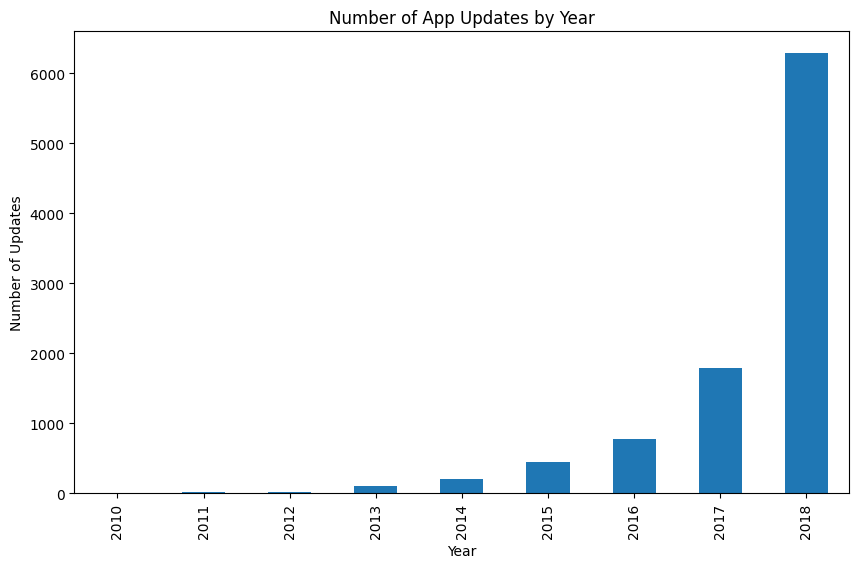

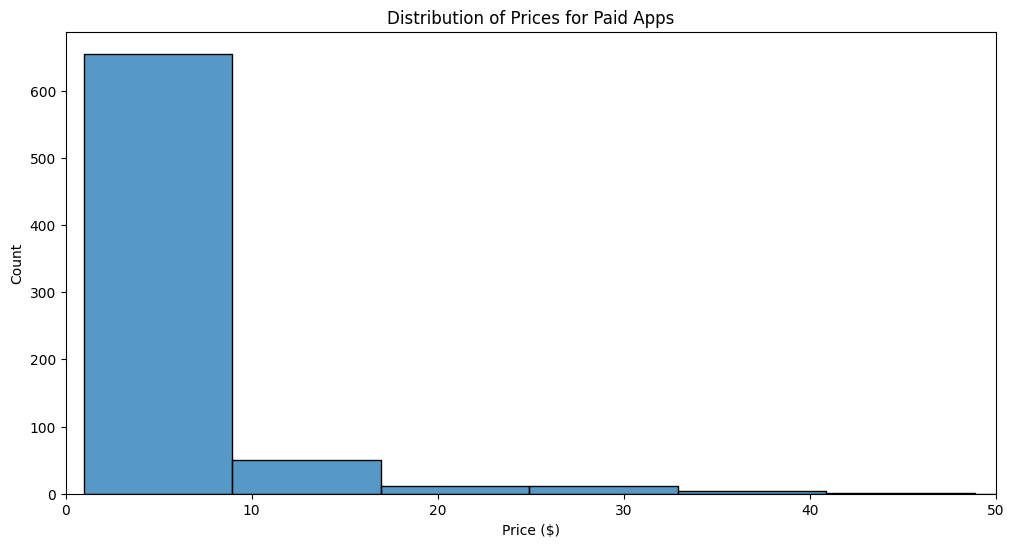

In [17]:
# Correlation heatmap
numeric_cols = apps_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(apps_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Time series analysis of app updates
apps_df['Year'] = apps_df['Last Updated'].dt.year
updates_by_year = apps_df.groupby('Year').size()
plt.figure(figsize=(10, 6))
updates_by_year.plot(kind='bar')
plt.title('Number of App Updates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()

# Price distribution for paid apps
plt.figure(figsize=(12, 6))
sns.histplot(paid_apps['Price'], bins=50)
plt.title('Distribution of Prices for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.xlim(0, 50)  # Limit to $50 for better visualization
plt.show()


Final Insights and Summary

After performing this analysis, here are some key insights about the Android app market:

1. Category Distribution: The majority of apps fall into categories like Family, Games, and Tools. These categories dominate the Play Store.

2. Ratings: Most apps have ratings between 4.0 and 4.5, indicating generally positive user experiences. Very few apps have ratings below 2.0.

3. Pricing: The vast majority of apps are free (about 90%). Paid apps typically cost less than 
10
,
w
i
t
h
s
o
m
e
p
r
e
m
i
u
m
a
p
p
s
g
o
i
n
g
u
p
t
o
10,withsomepremiumappsgoingupto50 or more.

4. Size vs Popularity: There's no strong correlation between app size and rating, but very large apps (over 50MB) tend to have slightly lower ratings.

5. Sentiment Analysis: Positive sentiments dominate user reviews, but sentiment polarity varies significantly by category. Some categories like "Social" have more polarized reviews.

6. Updates: The number of app updates has been increasing over the years, showing that developers are actively maintaining their apps.